Project: Pew/Smithsonian "Science Futures"
===

# Check below for examples involving PCA and Tensor Flow

About the Data
---

The data was collected by Pew and Smithsonian and is freely available [here](http://www.pewinternet.org/datasets/february-2014-views-of-science-and-the-future/).

This data is concerned with individuals' sentiments toward future technology.

Features (I've selected only the bold features for analysis):
- Sample
- Form
- Date
- Language
- Region
- Density
- USR
- Political Party
- Religion
- Employment
- Education
- Sex
- **Age**
- Race
- Income
- Ideology
- Question 1 (2)
- **Question 2 (5)**
- **Question 3 (4)**
- **Question 4 (3)**
- Question 5

***Goal: To determine whether an individual's opinion of future technology can be classfied by age group.***

To this end, I'll use the age groups used by Pew in the crosstab:
- 18-29
- 30-49
- 50-64
- 65+

### Questions

Question 1:
- a. Over the long term, you think that technological changes will lead to a future where people’s lives are mostly better or to a future where people’s lives are mostly worse?
- b. Over the long term, you think that technological changes will lead to a future where people’s lives are mostly worse or to a future where people’s lives are mostly better?

Question 2: How likely do you think it is that ... this will definitely happen, will probably happen, will probably NOT happen, or will definitely not happen?
- a) Computers will be as effective as people at creating important works of art such as music, novels, movies, or paintings.
- b) People in need of an organ transplant will have new organs custom made for them in a lab.
- c) Humans will build colonies on another planet that can be lived in for long periods.
- d) Humans will be able to control the weather.
- e) Scientists will have developed a way to teleport objects – that is, moving objects from one location to another without physically touching them.

Question 3: Do you think it will be a change for the better or a change for the worse if this happens?
- a) If lifelike robots become the primary caregivers for the elderly and people in poor health
- b) If personal and commercial drones are given permission to fly through most U.S. airspace
- c) If most people wear implants or other devices that constantly show them information about the world around them
- d) If prospective parents can alter the DNA of their children to produce smarter, healthier, or more athletic offspring

Question 4: Next, here are some things that people might be able to do in the next 50 years. For each, tell me, if this were possible, would YOU PERSONALLY do this.
- a) Eat meat that was grown in a lab
- b) Ride in a driverless car
- c) Get a brain implant to improve your memory or mental capacity

Question 5: Science fiction writers have always imagined new inventions that change the world of the future. How about you? If there was one futuristic invention that you could own, what would it be?
1.	Ability to live forever / Immortality
2.	Improved health and longevity / Cure for diseases
3.	Jetpack
4.	Personal space craft
5.	Personal robot / Robot servants
6.	Self driving car
7.	Time machine / Time travel
96.	[96] Other
97.	[97] None/Nothing/Not interested in futuristic inventions
98.	[98] Don’t know
99.	[99] Refused

Analysis
---

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
AGES = ['18-29', '30-49', '50-64', '65+']
COLUMNS = ['age', 'pial2a', 'pial2b', 'pial2c', 'pial2d', 'pial2e', 'pial3a', 'pial3b', 'pial3c', 'pial3d', 'pial4a', 'pial4b', 'pial4c', 'pial5']

In [7]:
data = pd.read_csv("Feb_2014_Views_Future_CSV.csv", usecols=COLUMNS)

In [8]:
def get_age_group(age):
    if age < 30:
        return "18-29"
    elif age < 50:
        return "30-49"
    elif age < 65:
        return "50-64"
    return "65+"

data['age_group'] = np.array([get_age_group(x) for x in data.age.values])

In [9]:
data.head()

,pial2a,pial2b,pial2c,pial2d,pial2e,pial3a,pial3b,pial3c,pial3d,pial4a,pial4b,pial4c,pial5,age,age_group
0,1,1,4,4,4,2,2,1,2,1,2,1,4,55,50-64
1,1,2,2,8,1,3,8,3,3,2,1,2,2,67,65+
2,2,2,2,3,3,8,1,1,1,1,1,1,98,58,50-64
3,3,2,4,4,4,8,2,2,1,1,2,1,98,84,65+
4,5,5,3,4,4,2,8,2,3,1,1,2,2,41,30-49


In [10]:
# Take data sample
train = data.sample(int(len(data) * 0.8))
test = data.drop(train.index)

In [11]:
# Plot a confusion matrix
def plot_cm(cm, title):
    plt.imshow(np.log(cm), cmap = 'Blues', interpolation = 'nearest')
    plt.grid(False)
    plt.title(title)
    plt.ylabel('Actual Age Group')
    plt.xlabel('Predicted Age Group')

### Why am I ignoring Questions 1 and 5?

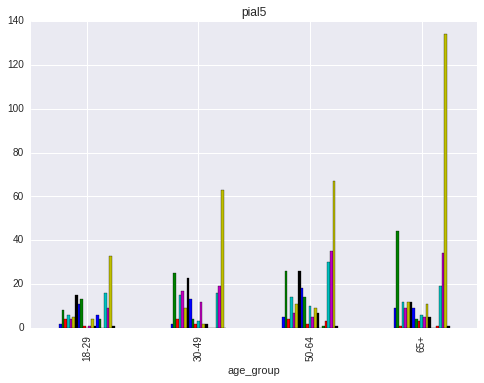

In [12]:
data.groupby(['age_group', 'pial5']).size().unstack().plot(kind='bar', title='pial5', legend=False)

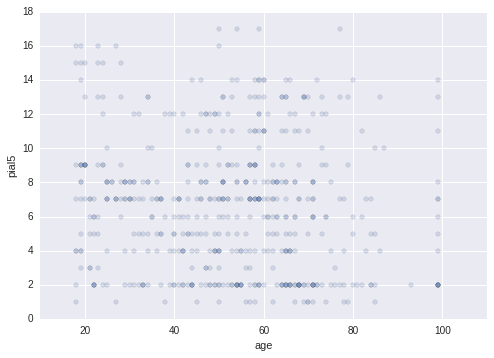

In [13]:
data[['age', 'pial5']].plot(kind='scatter', x='age', y='pial5', alpha=0.2, ylim=[0,18])

### Classifying with KNN over Question 2

             precision    recall  f1-score   support

      18-29       0.16      0.10      0.12        31
      30-49       0.29      0.27      0.28        52
      50-64       0.30      0.25      0.27        55
        65+       0.35      0.48      0.40        63

avg / total       0.29      0.30      0.29       201



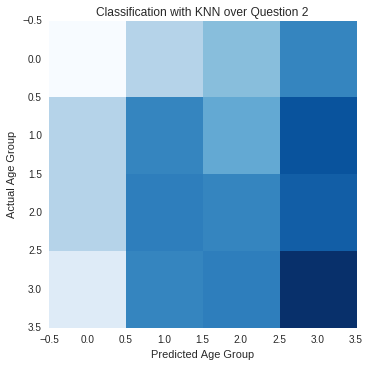

In [14]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(train.iloc[:, 0:5].values, train.age_group.values)

test_pred = knn.predict(test.iloc[:, 0:5].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with KNN over Question 2')

### Classifying with KNN over Question 3

             precision    recall  f1-score   support

      18-29       0.30      0.23      0.26        31
      30-49       0.18      0.04      0.06        52
      50-64       0.21      0.18      0.19        55
        65+       0.33      0.62      0.43        63

avg / total       0.25      0.29      0.24       201



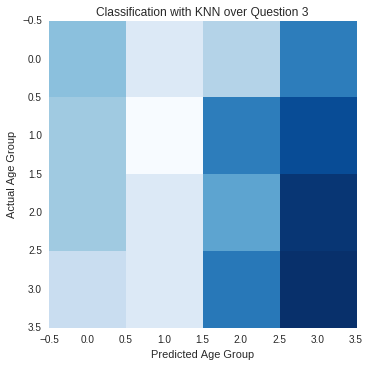

In [15]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(train.iloc[:, 5:9].values, train.age_group.values)

test_pred = knn.predict(test.iloc[:, 5:9].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with KNN over Question 3')

### Classifying with KNN over Question 4

             precision    recall  f1-score   support

      18-29       0.08      0.03      0.05        31
      30-49       0.32      0.48      0.39        52
      50-64       0.20      0.13      0.16        55
        65+       0.26      0.32      0.29        63

avg / total       0.23      0.26      0.24       201



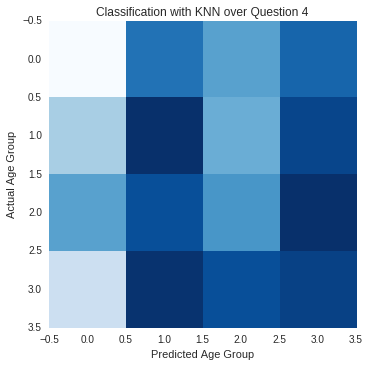

In [16]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(train.iloc[:, 9:12].values, train.age_group.values)

test_pred = knn.predict(test.iloc[:, 9:12].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with KNN over Question 4')

### Classifying with KNN over Question 5

             precision    recall  f1-score   support

      18-29       0.29      0.13      0.18        31
      30-49       0.33      0.37      0.35        52
      50-64       0.19      0.16      0.17        55
        65+       0.42      0.54      0.47        63

avg / total       0.31      0.33      0.31       201



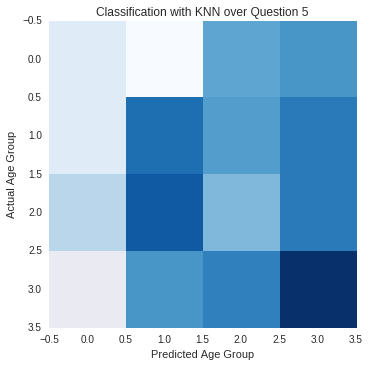

In [17]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(train.pial5.values.reshape([len(train.pial5), 1]), train.age_group.values)

test_pred = knn.predict(test.pial5.values.reshape([len(test), 1]))

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with KNN over Question 5')

### Classifying with KNN over Questions 2-4

             precision    recall  f1-score   support

      18-29       0.11      0.03      0.05        31
      30-49       0.26      0.31      0.28        52
      50-64       0.30      0.36      0.33        55
        65+       0.45      0.46      0.45        63

avg / total       0.31      0.33      0.31       201



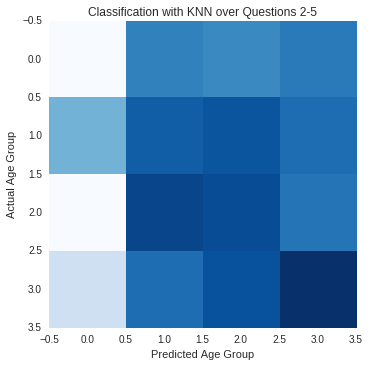

In [18]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(train.iloc[:, 0:12].values, train.age_group.values)

test_pred = knn.predict(test.iloc[:, 0:12].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with KNN over Questions 2-5')

### Classifying with a Decision Tree over Questions 2-5

             precision    recall  f1-score   support

      18-29       0.12      0.13      0.13        31
      30-49       0.21      0.21      0.21        52
      50-64       0.23      0.24      0.23        55
        65+       0.36      0.33      0.34        63

avg / total       0.25      0.24      0.25       201



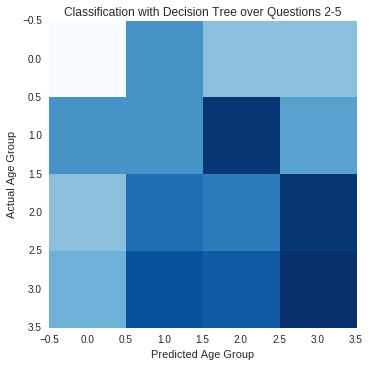

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(train.iloc[:, 0:12].values, train.age_group.values)

test_pred = dtc.predict(test.iloc[:, 0:12].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with Decision Tree over Questions 2-5')

Obviously, neither classifier does a very good job. And yet, the classifier typically produces the correct answer a little more than one out of four times, sometimes as high as one out of three. With four possible classifications, this suggests the data is random.

### Random Forest

             precision    recall  f1-score   support

      18-29       0.21      0.16      0.18        31
      30-49       0.14      0.13      0.14        52
      50-64       0.32      0.33      0.32        55
        65+       0.37      0.41      0.39        63

avg / total       0.27      0.28      0.27       201



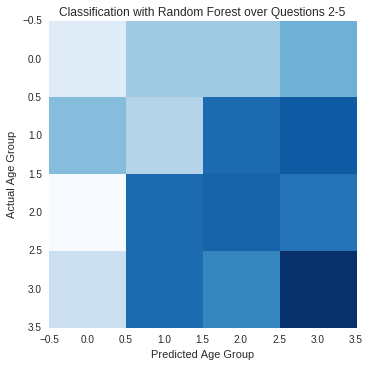

In [20]:
rfc = RandomForestClassifier()
rfc.fit(train.iloc[:, 0:12].values, train.age_group.values)

test_pred = rfc.predict(test.iloc[:, 0:12].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with Random Forest over Questions 2-5')

### Support Vector Machine

             precision    recall  f1-score   support

      18-29       0.44      0.13      0.20        31
      30-49       0.28      0.23      0.25        52
      50-64       0.40      0.45      0.42        55
        65+       0.42      0.57      0.48        63

avg / total       0.38      0.38      0.36       201



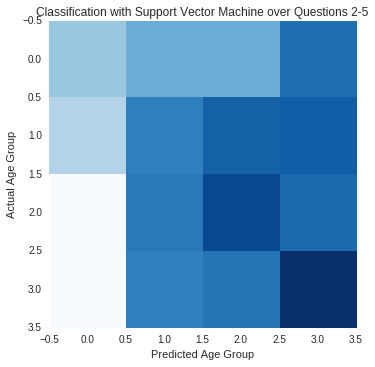

In [21]:
svc = SVC(kernel='rbf')
svc.fit(train.iloc[:, 0:12].values, train.age_group.values)

test_pred = svc.predict(test.iloc[:, 0:12].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with Support Vector Machine over Questions 2-5')

             precision    recall  f1-score   support

      18-29       0.00      0.00      0.00        31
      30-49       0.43      0.19      0.27        52
      50-64       0.34      0.53      0.41        55
        65+       0.43      0.63      0.51        63

avg / total       0.34      0.39      0.34       201



/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


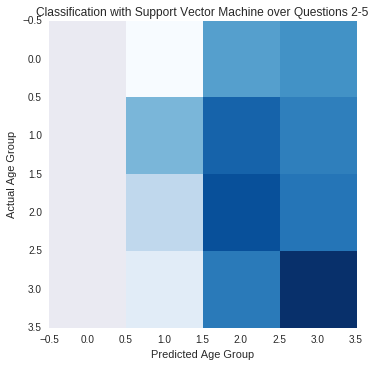

In [22]:
svc = SVC(kernel='linear')
svc.fit(train.iloc[:, 0:12].values, train.age_group.values)

test_pred = svc.predict(test.iloc[:, 0:12].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with Support Vector Machine over Questions 2-5')

             precision    recall  f1-score   support

      18-29       0.21      0.16      0.18        31
      30-49       0.22      0.21      0.22        52
      50-64       0.27      0.33      0.30        55
        65+       0.37      0.37      0.37        63

avg / total       0.28      0.28      0.28       201



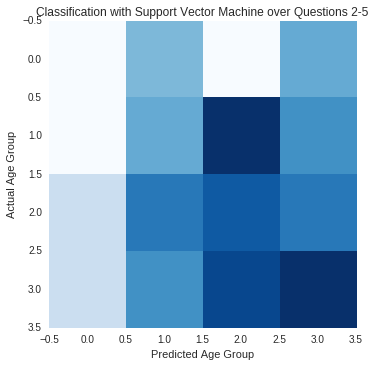

In [23]:
svc = SVC(kernel='poly')
svc.fit(train.iloc[:, 0:12].values, train.age_group.values)

test_pred = svc.predict(test.iloc[:, 0:12].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred, labels = AGES), 'Classification with Support Vector Machine over Questions 2-5')

The polynomial kernel takes a long time and its accuracy fluctuates greatly. Here, the accuracy is high. At other times, it isn't.

### Multinomial Naive Bayes over Questions 1 and 2

             precision    recall  f1-score   support

      18-29       0.25      0.03      0.06        31
      30-49       0.33      0.02      0.04        52
      50-64       0.24      0.36      0.29        55
        65+       0.32      0.56      0.40        63

avg / total       0.29      0.28      0.22       201



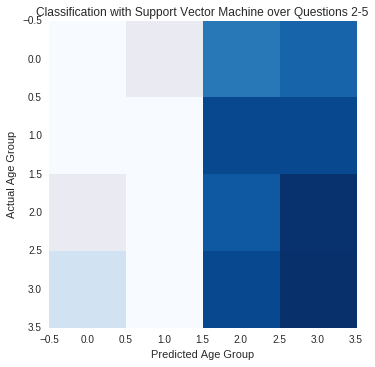

In [24]:
mnb = MultinomialNB()
mnb.fit(train.iloc[:, 0:12].values, train.age_group.values)

test_pred = mnb.predict(test.iloc[:, 0:12].values)

print(classification_report(test.age_group.values, test_pred))

plot_cm(confusion_matrix(test.age_group.values, test_pred), 'Classification with Support Vector Machine over Questions 2-5')

Predicting Age
---

### With a Support Vector Machine

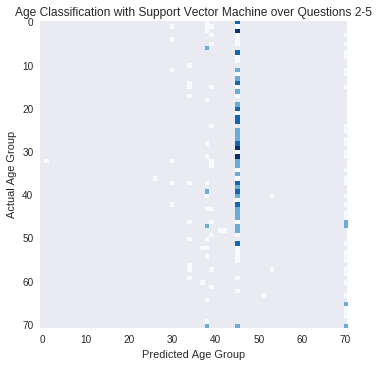

In [25]:
svc = SVC(kernel='rbf')
svc.fit(train.iloc[:, 0:12].values, train.age.values)

test_pred = svc.predict(test.iloc[:, 0:12].values)

#print(classification_report(test.age.values, test_pred))

plot_cm(confusion_matrix(test.age.values, test_pred), 'Age Classification with Support Vector Machine over Questions 2-5')

It correctly classified about 1% of the ages correctly. With an *approximate* age range of 100, this suggests, again, that the data does not correlate with age. But regression would be a better fit for this.

### With a Random Forest Regressor

In [26]:
rfr = RandomForestRegressor()
rfr.fit(train.iloc[:, 0:12].values, train.age.values)
print("Score: ", rfr.score(test.iloc[:, 0:12].values, test.age.values))

Score:  -0.154960225365


### With Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(train.iloc[:, 0:12].values, train.age.values)
print("Score: ", lr.score(test.iloc[:, 0:12].values, test.age.values))

Score:  0.0803985875627


These are terrible scores. So ages instead of age groups don't work well either.

# Plotting the Raw Data

### Question 2

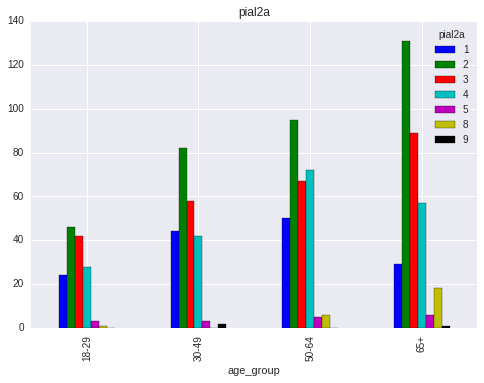

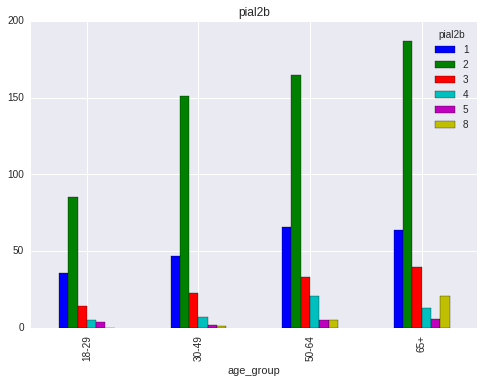

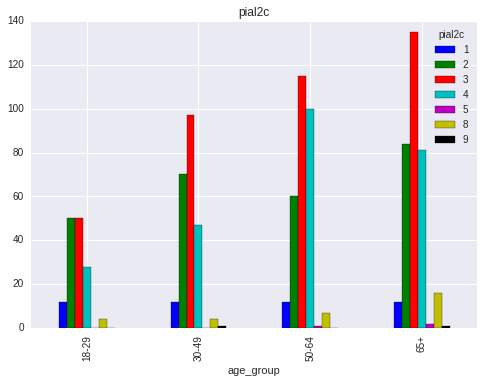

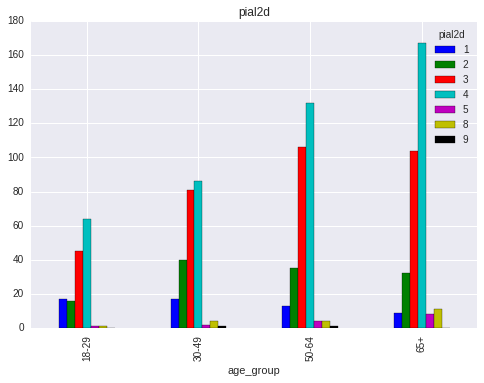

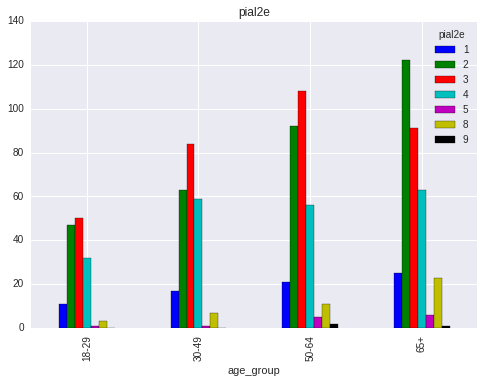

In [28]:
plots2 = ['pial2a', 'pial2b', 'pial2c', 'pial2d', 'pial2e']

for cat in plots2:
    data.groupby(['age_group', cat]).size().unstack().plot(kind='bar', title=cat)

### Question 3

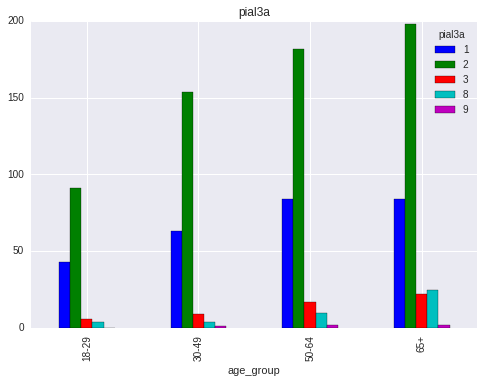

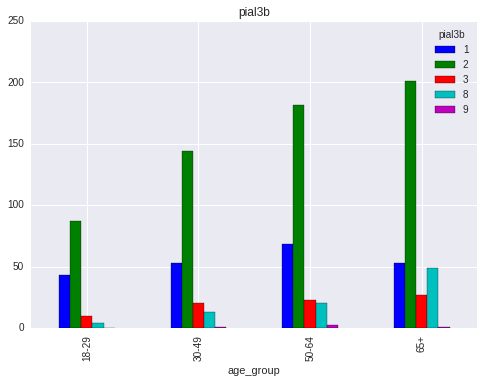

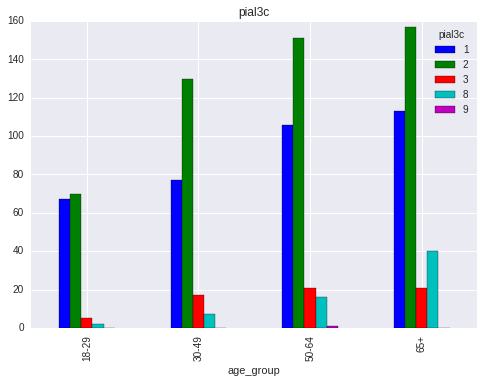

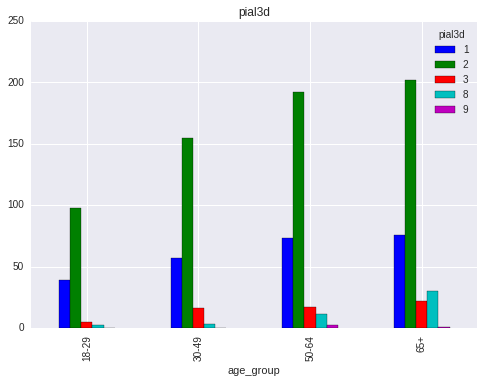

In [29]:
plots3 = ['pial3a', 'pial3b', 'pial3c', 'pial3d']

for cat in plots3:
    data.groupby(['age_group', cat]).size().unstack().plot(kind='bar', title=cat)

### Question 4

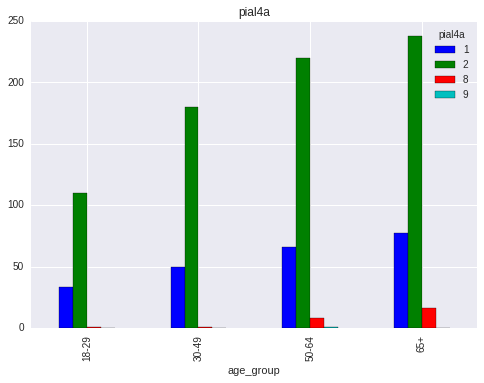

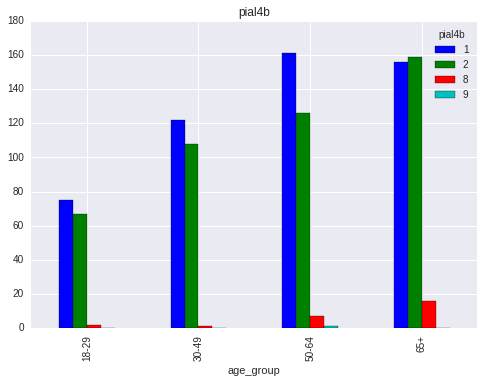

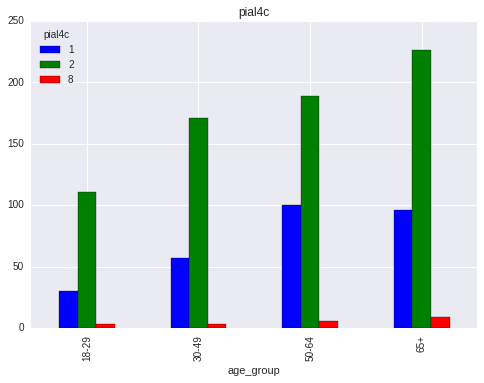

In [30]:
plots4 = ['pial4a', 'pial4b', 'pial4c']

for cat in plots4:
    data.groupby(['age_group', cat]).size().unstack().plot(kind='bar', title=cat)

Conclusion
===

An intelligent monkey with a pencil could classify people into these age groups just as accurately.

A lucky intelligent monkey could do an even better job.

**That is to say, people CANNOT be classfied into age groups based on their feelings about future technology.**


Remarks
===

What's next?
- Text analysis on Question 5's open-ended response
- Only consider the provided answers; ignore "Don't know" and "No response"
- Use Question 1

Why not use more of the demographic features?
- If I need to use sex and region in addition to the question responses, then I'm categorizing individuals into broad demographic categories instead of just age.

Why not use more political features?
- The political party/ideology is tied closely to worldview. It would likely outweigh the other categories in such a way as to make the analysis moot. Best save this for a later analysis.

And what about religion?
- Like the political features, best save this for a later analysis.

### PCA with Support Vector Machine

In [52]:
from sklearn.decomposition import RandomizedPCA

training_data = train.iloc[:, 0:12].values
training_target = train.age_group.values
test_data = test.iloc[:, 0:12].values
test_target = test.age_group.values

pca = RandomizedPCA(n_components=12, random_state=None).fit(training_data)

training_pca = pca.transform(training_data)
test_pca = pca.transform(test_data)

clf = SVC()
clf.fit(training_pca, training_target)
test_predicted = clf.predict(test_pca)

print('All Components')
print(classification_report(test_target, test_predicted))

All Components
             precision    recall  f1-score   support

      18-29       0.44      0.13      0.20        31
      30-49       0.28      0.23      0.25        52
      50-64       0.40      0.45      0.42        55
        65+       0.42      0.57      0.48        63

avg / total       0.38      0.38      0.36       201



In [69]:
pca = RandomizedPCA(n_components=4, random_state=None).fit(training_data)

training_pca = pca.transform(training_data)
test_pca = pca.transform(test_data)

clf = SVC()
clf.fit(training_pca, training_target)
test_predicted = clf.predict(test_pca)

print('All Components')
print(classification_report(test_target, test_predicted))

All Components
             precision    recall  f1-score   support

      18-29       0.00      0.00      0.00        31
      30-49       0.42      0.15      0.23        52
      50-64       0.29      0.36      0.32        55
        65+       0.36      0.63      0.46        63

avg / total       0.30      0.34      0.29       201



/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Principal component analysis is not useful for a Support Vector Machine this dataset. Eliminating any components decreases the accuracy of the classifier on the dataset.

### PCA with KNN

In [71]:
pca = RandomizedPCA(n_components=12, random_state=None).fit(training_data)

training_pca = pca.transform(training_data)
test_pca = pca.transform(test_data)

clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(training_pca, training_target)
test_predicted = clf.predict(test_pca)

print('All Components')
print(classification_report(test_target, test_predicted))

All Components
             precision    recall  f1-score   support

      18-29       0.31      0.13      0.18        31
      30-49       0.29      0.29      0.29        52
      50-64       0.34      0.38      0.36        55
        65+       0.41      0.49      0.45        63

avg / total       0.35      0.35      0.34       201



In [72]:
pca = RandomizedPCA(n_components=4, random_state=None).fit(training_data)

training_pca = pca.transform(training_data)
test_pca = pca.transform(test_data)

clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(training_pca, training_target)
test_predicted = clf.predict(test_pca)

print('All Components')
print(classification_report(test_target, test_predicted))

All Components
             precision    recall  f1-score   support

      18-29       0.24      0.13      0.17        31
      30-49       0.35      0.33      0.34        52
      50-64       0.34      0.40      0.37        55
        65+       0.46      0.52      0.49        63

avg / total       0.37      0.38      0.37       201



With KNN, principal component analysis seems to boost the results slightly. Therefore, both the Support Vector Machine and the KNN Classifier are pushing (but not quite reaching) 0.40 precision, recall, and f1-score. This is better than guessing, but the difference is negligible. Classification is still poor.